<a href="https://colab.research.google.com/github/PSivaMallikarjun/Advanced-Customer-Segmentation-using-Machine-Learning/blob/main/Advanced_Customer_Segmentation_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Advanced Customer Segmentation using Machine Learning

In this project, we will use a new and advanced segmentation library developed by the Massachusetts Institute of Technology (MIT). The customer data in our Customer Segmentation project, which is included in the entry and intermediate level projects, was simple and the K-Means clustering algorithm was sufficient for segmentation. But life is not that simple! When you have complex customer data, if you do clustering with K-Means, you may get erroneous results! Since the customer data in this project is complex data (both numeric and categorical) just like in real life, here we will use a special unsupervised learning algorithm instead of a standard model and divide our 2000 customers into groups with the latest artificial intelligence algorithms.

Create a groups of in based on Global Business lines better interactivity on next service approach and reducing the time latency and increasing the customer interactivity.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


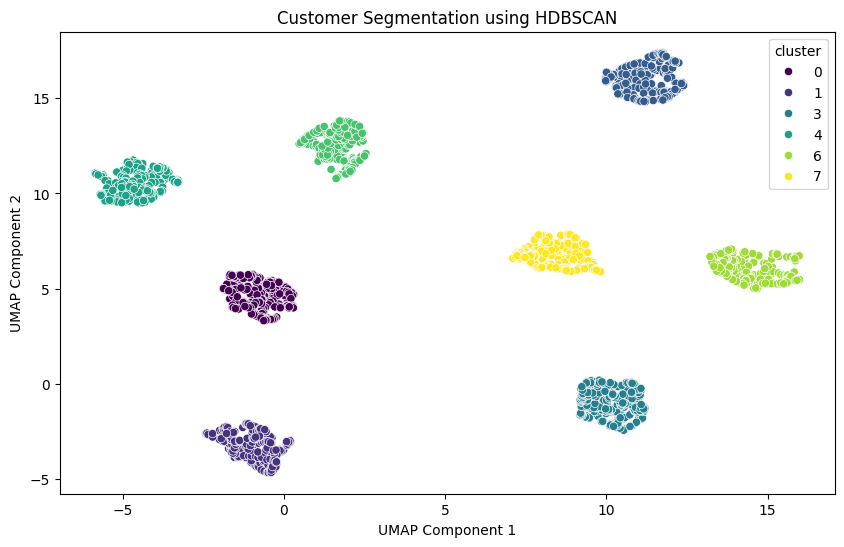

Segmentation Completed! Data saved as 'customer_segmented.csv'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Generate a sample dataset
data = pd.DataFrame({
    'CustomerID': range(1, 2001),
    'Age': np.random.randint(18, 70, 2000),
    'AnnualIncome': np.random.randint(20000, 150000, 2000),
    'SpendingScore': np.random.randint(1, 100, 2000),
    'Gender': np.random.choice(['Male', 'Female'], 2000),
    'Region': np.random.choice(['North America', 'Europe', 'Asia', 'South America'], 2000)
})

# Save dataset
data.to_csv('customer_data.csv', index=False)

# Identify numerical and categorical features
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = data.select_dtypes(include=['object']).columns.tolist()

# Preprocessing Pipeline
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Apply transformations
data_transformed = preprocessor.fit_transform(data)

# Dimensionality Reduction using UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
data_umap = reducer.fit_transform(data_transformed)

# Clustering using HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, gen_min_span_tree=True)
data['cluster'] = clusterer.fit_predict(data_umap)

# Alternative Clustering using GMM
gmm = GaussianMixture(n_components=5, random_state=42)
data['gmm_cluster'] = gmm.fit_predict(data_transformed)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_umap[:, 0], y=data_umap[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Customer Segmentation using HDBSCAN')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

# Save clustered data
data.to_csv('customer_segmented.csv', index=False)
print("Segmentation Completed! Data saved as 'customer_segmented.csv'")


In [2]:
!pip install umap-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.7 MB/s eta 0:00:00


This code is about grouping customers based on their characteristics using Artificial Intelligence (AI) and Machine Learning (ML). It helps businesses understand different types of customers, improving marketing and customer service. Let's break it down step by step.

1. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import hdbscan
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


These are tools (libraries) that help with data processing, visualization, and AI techniques.
pandas & numpy: Used for handling customer data.
matplotlib & seaborn: Used for creating graphs.
umap & hdbscan: Advanced AI algorithms for grouping customers.
scikit-learn (sklearn): Helps in cleaning, transforming, and grouping data.


2. Generating Sample Customer Data

In [ ]:
data = pd.DataFrame({
    'CustomerID': range(1, 2001),
    'Age': np.random.randint(18, 70, 2000),
    'AnnualIncome': np.random.randint(20000, 150000, 2000),
    'SpendingScore': np.random.randint(1, 100, 2000),
    'Gender': np.random.choice(['Male', 'Female'], 2000),
    'Region': np.random.choice(['North America', 'Europe', 'Asia', 'South America'], 2000)
})


 What is happening here?

We are creating a fake customer dataset of 2000 customers.
Each customer has:
CustomerID: A unique number for each customer.
Age: Random age between 18 and 70.
AnnualIncome: Random income between $20,000 and $150,000.
SpendingScore: A score (1 to 100) showing how much they spend.
Gender: Either Male or Female.
Region: A random region from North America, Europe, Asia, or South America.


3. Saving the Dataset



In [ ]:
data.to_csv('customer_data.csv', index=False)


This saves the data to a file called customer_data.csv so we can use it later.

4. Identifying Data Types

In [ ]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = data.select_dtypes(include=['object']).columns.tolist()


We separate numbers (Age, AnnualIncome, SpendingScore) and categories (Gender, Region).

5. Data Preprocessing (Cleaning)




In [ ]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


 Why is this needed?

AI models work best when data is clean.
StandardScaler(): Adjusts number values (like income, age) so they are evenly distributed.
OneHotEncoder(): Converts text data (like Gender: Male/Female) into numbers.


6. Applying Transformations

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
data_umap = reducer.fit_transform(data_transformed)


This applies scaling and encoding to make the data AI-ready.

7. Dimensionality Reduction (Making Data Simpler)



In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
data_umap = reducer.fit_transform(data_transformed)


UMAP (Uniform Manifold Approximation and Projection) simplifies complex customer data without losing key information.
Converts multiple features into just 2 dimensions, making it easier to visualize.

8. Clustering Customers (Grouping Similar Ones)
A) Using HDBSCAN (Advanced Clustering)
HDBSCAN finds natural customer groups in a smart way.
Customers with similar spending habits, income, or regions get grouped together.

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, gen_min_span_tree=True)
data['cluster'] = clusterer.fit_predict(data_umap)


B) Alternative Method: Gaussian Mixture Model (GMM)

In [ ]:
gmm = GaussianMixture(n_components=5, random_state=42)
data['gmm_cluster'] = gmm.fit_predict(data_transformed)


GMM is another AI method that assigns each customer a probability of belonging to different groups.


9. Visualizing the Customer Groups



In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_umap[:, 0], y=data_umap[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Customer Segmentation using HDBSCAN')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


Creates a scatterplot where customers with similar features appear in the same group.
Each color = a customer segment.


10. Saving the Final Segmented Data

In [ ]:
data.to_csv('customer_segmented.csv', index=False)
print("Segmentation Completed! Data saved as 'customer_segmented.csv'")


Saves the customer groups into a file customer_segmented.csv so businesses can use it.

Why Is This Useful?

For Businesses:

Understand Customer Behavior → Find patterns in customer purchases.
Targeted Marketing → Send personalized offers to similar customer groups.
Reduce Costs → Focus on profitable customer segments.

For AI Engineers:

Learn advanced clustering methods beyond K-Means.
Use UMAP & HDBSCAN, which handle real-world messy data better.


Summary
Create Fake Customer Data (Age, Income, Spending, Gender, Region).
Clean and Prepare the Data (Scaling & Encoding).
Reduce Complexity using UMAP.
Group Customers using HDBSCAN & GMM.
Visualize & Save the Results.